In [74]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
cover_path = 'D:/Cover/ALASKA_v2_BMP_256_COLOR'
stego_path = 'D:/Stego/26_Image_Steganography/23_Image_Steganography/ALASKA_v2_BMP_256_COLOR/'

In [76]:
def calc_residual(stego, cover):
    residual = np.abs(stego.astype(np.int16) - cover.astype(np.int16)).astype(np.uint8)
    return residual

In [77]:
bpp = ['0.50', '0.40', '0.30', '0.20', '0.10', '0.05']

In [78]:
def show_bit(cover_path: str, stego_path: str, multiple: int, color_B: int, color_G, color_R):
    filenames_stego = os.listdir(stego_path)
    filenames_stego = list(filter(lambda x: x if x[-4:] == '.png' else None, filenames_stego))

    filenames_stego_random_sample = random.sample(filenames_stego, 1000)

    bit_cnt = [0, 0, 0, 0, 0, 0, 0, 0]

    for filename in filenames_stego_random_sample:
        stego = cv2.imread(os.path.join(stego_path, filename))
        cover = cv2.imread(os.path.join(cover_path, filename[:-4]+'.bmp'))
        img_s = calc_residual(stego, cover) * multiple

        res_bit = img_s[np.where(img_s>0)]
        for i in res_bit:
            bin_bit = np.binary_repr(i, width=8)
            if (bin_bit[7] == '1'):
                bit_cnt[7] += 1
            if (bin_bit[6] == '1'):
                bit_cnt[6] += 1
            if (bin_bit[5] == '1'):
                bit_cnt[5] += 1
            if (bin_bit[4] == '1'):
                bit_cnt[4] += 1
            if (bin_bit[3] == '1'):
                bit_cnt[3] += 1
            if (bin_bit[2] == '1'):
                bit_cnt[2] += 1
            if (bin_bit[1] == '1'):
                bit_cnt[1] += 1
            if (bin_bit[0] == '1'):
                bit_cnt[0] += 1

    # print(bit_cnt)
    bit_per = [0,0,0,0,0,0,0,0]
    for i in range(8):
        bit_per[i] = bit_cnt[i] /sum(bit_cnt) * 100
        # print(bit_per)

    x = np.arange(8)
    plt.figure(figsize=(6, 6))
    plt.bar(x, bit_per)
    plt.title('Plot of bit count - ' +stego_path[-4:], fontsize=20)

    for index, value in enumerate(bit_per):
        plt.text(index - 0.35 , value + 0.5, str(value)[:5]+"%")
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

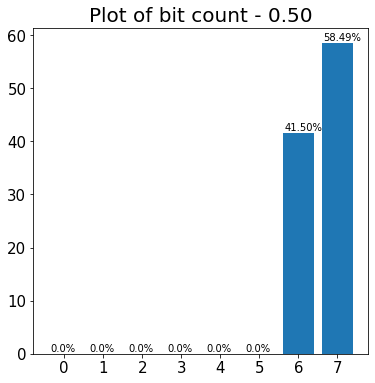

In [79]:
show_bit(cover_path, os.path.join(stego_path, bpp[0]), 1, 0, 0, 0)

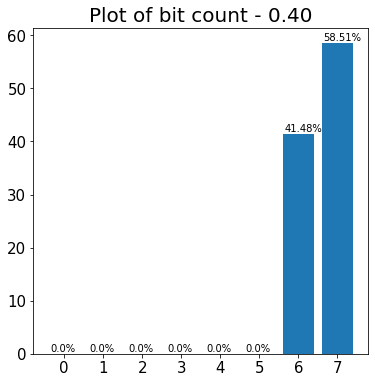

In [80]:
show_bit(cover_path, os.path.join(stego_path, bpp[1]), 1, 0, 0, 0)

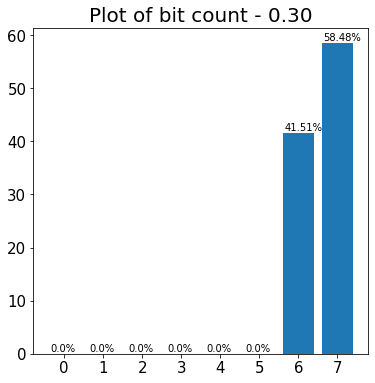

In [81]:
show_bit(cover_path, os.path.join(stego_path, bpp[2]), 1, 0, 0, 0)

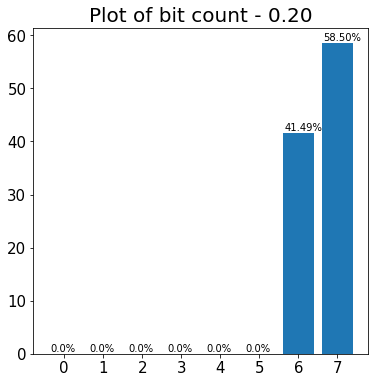

In [82]:
show_bit(cover_path, os.path.join(stego_path, bpp[3]), 1, 0, 0, 0)

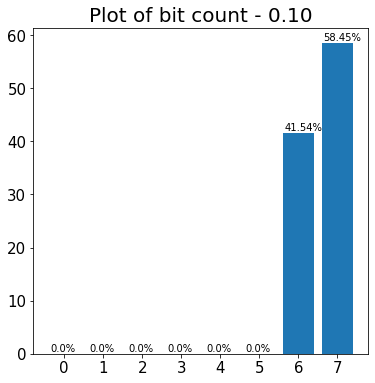

In [83]:
show_bit(cover_path, os.path.join(stego_path, bpp[4]), 1, 0, 0, 0)

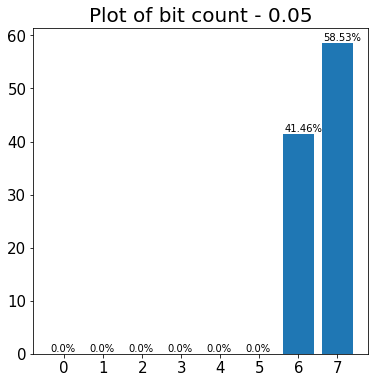

In [84]:
show_bit(cover_path, os.path.join(stego_path, bpp[5]), 1, 0, 0, 0)